In [8]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
#from configs.RecursiveVPSDE.Markovian_fQuadSinHF.recursive_Markovian_PostMeanScore_fQuadSinHF2_LowFTh_T256_H05_tl_110data_StbleTgt  import get_config
from configs.RecursiveVPSDE.Markovian_fSinLog.recursive_Markovian_PostMeanScore_fSinLog_LowFTh_T256_H05_tl_110data_StbleTgt import get_config
#from configs.RecursiveVPSDE.Markovian_fBiPot.recursive_Markovian_PostMeanScore_fBiPot_LowFTh_T256_H05_tl_110data_StbleTgt import get_config

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [9]:
from IPython.core.magic import register_cell_magic

@register_cell_magic
def skip(line, cell):
    return

In [10]:
config = get_config()
root_dir ="/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/"
hermite_dir = root_dir + "ExperimentResults/Hermite/"
if "SinLog" in config.data_path:
    diradd = "SinLog"
elif "QuadSin" in config.data_path:
    diradd = "QuadSinHF"
elif "BiPot" in config.data_path:
    diradd = "BiPot"
if config.diffusion == 0.1:
        diradd+= "LowNoise"
elif config.diffusion == 10.:
    diradd += "HighNoise"
hermite_dir += diradd+"LessData/"
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Hermite/SinLogLessData/


In [17]:
for f in os.listdir(hermite_dir):
    assert "10240NPath" not in f
    assert "Diff" not in f
    if "T_MSEs" in f:
        print(f)
        mse = pd.read_parquet(hermite_dir+f, engine="fastparquet")

Hermite_fSinLog_DriftEvalExp_1024NPaths_3906e-03dT_MSEs.parquet


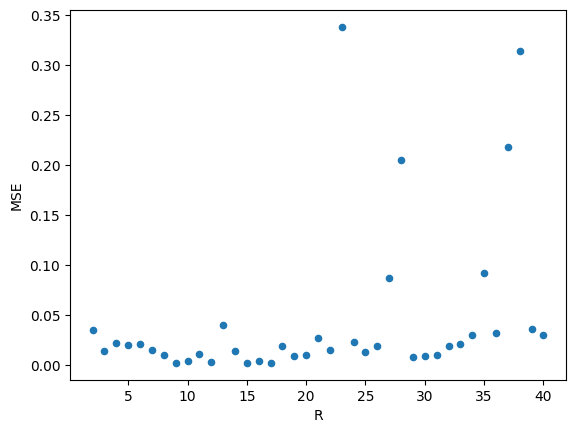

In [18]:
mse.reset_index(drop=False).plot(kind="scatter", x="index", y="0")
plt.xlabel("R")
plt.ylabel("MSE")
plt.show()
plt.close()

In [19]:
print(mse, mse.dropna().index[np.argmin(mse.dropna().values.flatten())])
R = mse.index[np.argmin(mse.dropna().values.flatten())]

              0
index          
2      0.034922
3      0.013384
4      0.021736
5      0.019536
6      0.020372
7      0.014438
8      0.009826
9      0.001813
10     0.003431
11     0.010816
12     0.002230
13     0.039372
14     0.013829
15     0.001720
16     0.003481
17     0.002074
18     0.018748
19     0.008480
20     0.010067
21     0.026367
22     0.014339
23     0.338180
24     0.022395
25     0.012568
26     0.018874
27     0.086896
28     0.204453
29     0.007935
30     0.008160
31     0.009643
32     0.018204
33     0.020274
34     0.029602
35     0.091623
36     0.032121
37     0.217654
38     0.314568
39     0.035991
40     0.029241 15


In [24]:
print(hermite_dir)

/Users/marcos/Library/CloudStorage/OneDrive-ImperialCollegeLondon/StatML_CDT/Year2/DiffusionModels/ExperimentResults/Hermite/SinLogLessData/


In [28]:
from configs import project_config
num_paths = 1024
save_path = hermite_dir + f"Hermite_f{diradd}_DriftEvalExp_{num_paths}NPaths_{config.deltaT:.3e}dT".replace(".", "")
all_hermite_drifts = np.load(save_path + f"_{R}_drift_est.npy")
all_true_drifts=np.load(save_path + f"_{R}_true_drift.npy", allow_pickle=True)
all_true_paths = np.load(save_path + f"_{R}_true_paths.npy", allow_pickle=True)

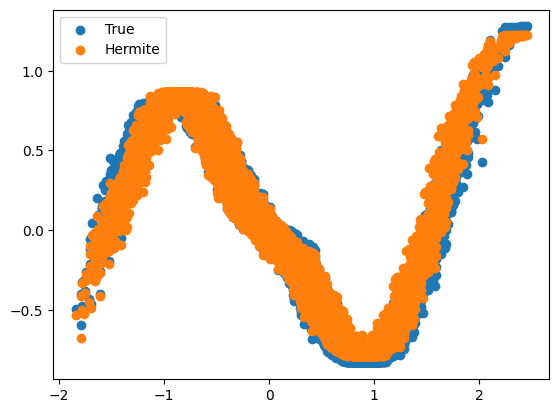

In [29]:
plt.scatter(all_true_paths.flatten(), all_true_drifts.flatten(), label="True")
plt.scatter(all_true_paths.flatten(), all_hermite_drifts.flatten(), label="Hermite")
plt.legend()
plt.show()